In [176]:
## Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [177]:
df1 = pd.read_csv('demographics_dataset.csv')
df2 = pd.read_csv('income_dataset.csv')
df2

,Id,capital-gain,capital-loss,hours-per-week,salary
0,1,2174,0,40,<=50K
1,2,0,0,13,<=50K
2,3,0,0,40,<=50K
3,4,0,0,40,<=50K
4,5,0,0,40,<=50K
...,...,...,...,...,...
32556,32557,0,0,38,<=50K
32557,32558,0,0,40,>50K
32558,32559,0,0,40,<=50K
32559,32560,0,0,20,<=50K


In [178]:
df = pd.merge(df1,df2, on='Id')
# We set the Id as an index for our dataframe
df.set_index('Id', inplace=True)
df.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,native-country,capital-gain,capital-loss,hours-per-week,salary
Id,,,,,,,,,,,,,,,
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,2174,0,40,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0,0,13,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0,0,40,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0,0,40,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0,0,40,<=50K


## 2. What can you tell us about each of the columns? Visualise and describe any findings.

In [179]:
# The summurized information of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 1 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  native-country  32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [180]:
cat1 = (df.dtypes == 'object')
object_cols = list(cat1[cat1].index)

print("The list of our categorical variables:\n")
print(object_cols)



The list of our categorical variables:

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']


In [181]:
cat2 = (df.dtypes != 'object')
object_cols = list(cat2[cat2].index)

print("The list of our numerical variables:\n")
print(object_cols)

The list of our numerical variables:

['Age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [182]:
df.describe()

,Age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [183]:
# Removing duplicate rows if there is any
print('Shape before deleting duplicate values:', df.shape)
df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)
# The data doesn't contain any duplicate values or missing ones

Shape before deleting duplicate values: (32561, 15)
Shape After deleting duplicate values: (32537, 15)


# Basic data explatory analysis

## Categorical variables

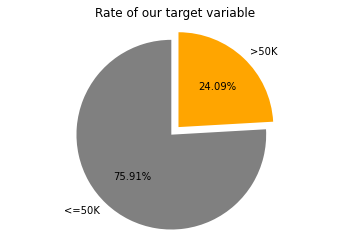

In [184]:
# Exploring our taget variable salary to check if it's imbalanced because if the data is imbalanced 
# it will affect the F1 score of the minority class

nbr_val=df["salary"].value_counts().tolist()
nbr_val=[i * 100/sum(nbr_val) for i in nbr_val]
labels=["<=50K",">50K"]
scale=nbr_val[0]/nbr_val[1]
exp = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(nbr_val, explode=exp, labels=labels, autopct='%1.2f%%',shadow=False,
        colors=['grey','orange'],
        startangle=90)
ax1.axis('equal')
plt.title('Rate of our target variable')
plt.show()


In [185]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
       
    # Generating the subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

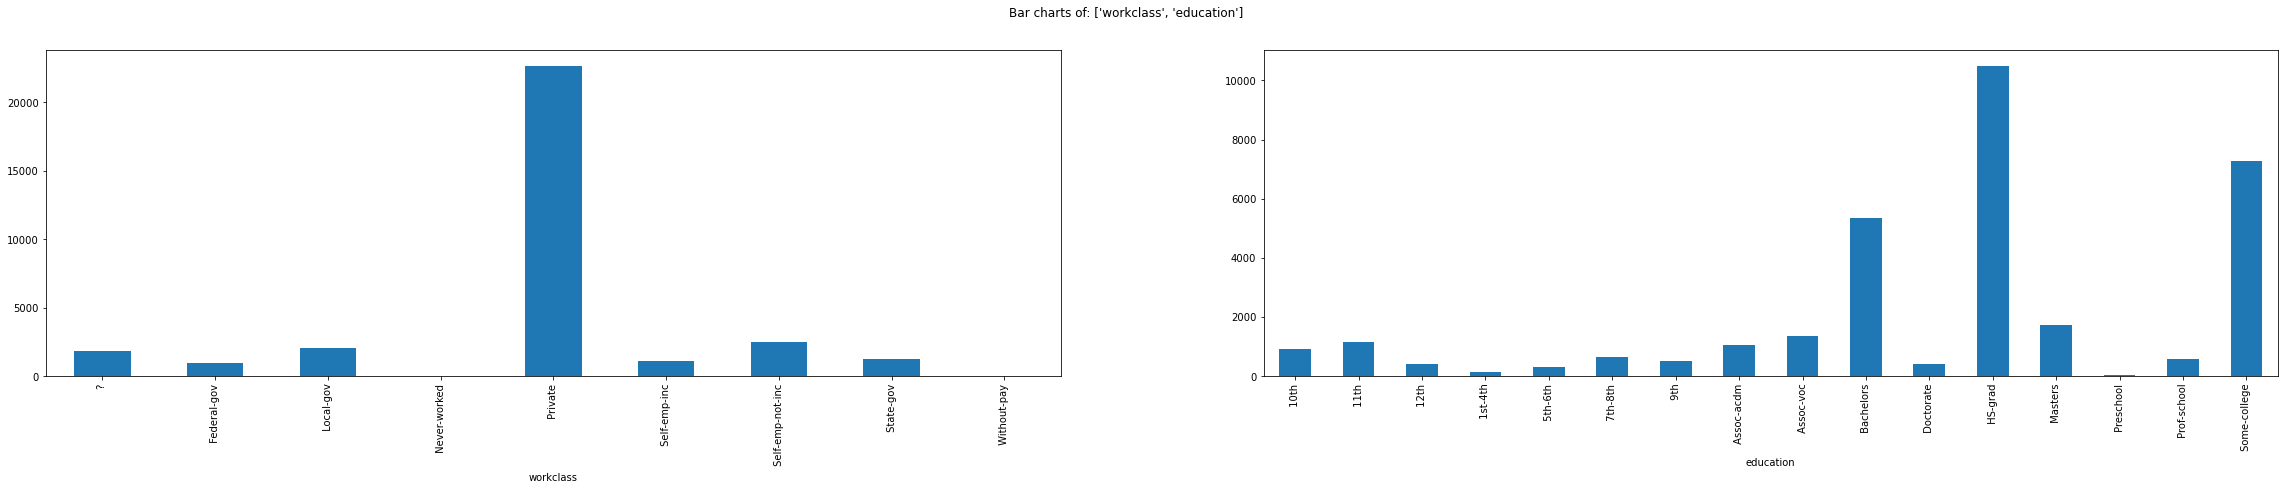

In [186]:
# Plotting our categorical variables
PlotBarCharts(inpData=df, colsToPlot=['workclass', 'education']);


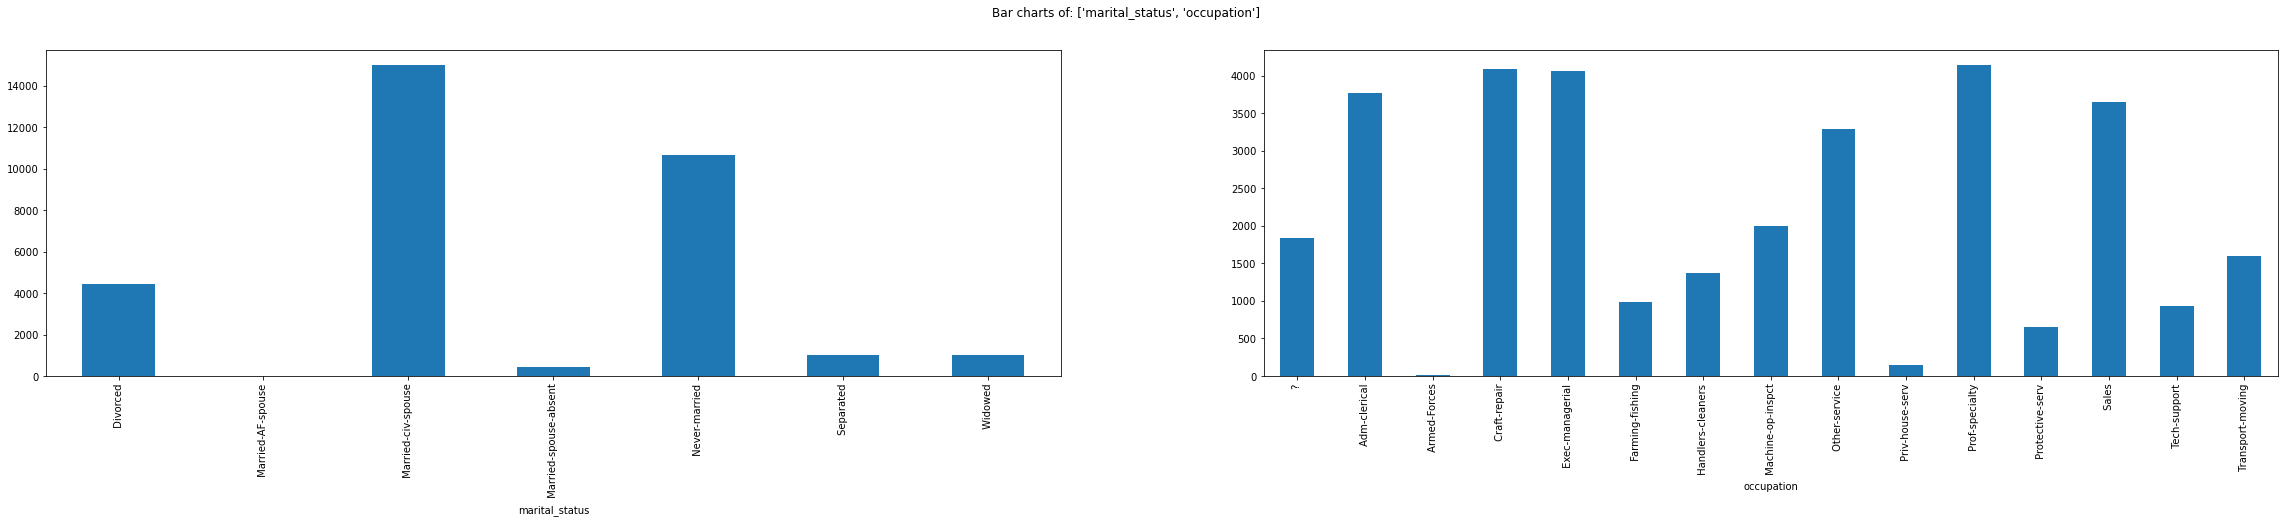

In [187]:
PlotBarCharts(inpData=df, colsToPlot=['marital_status', 'occupation']);
# Education has some missing values

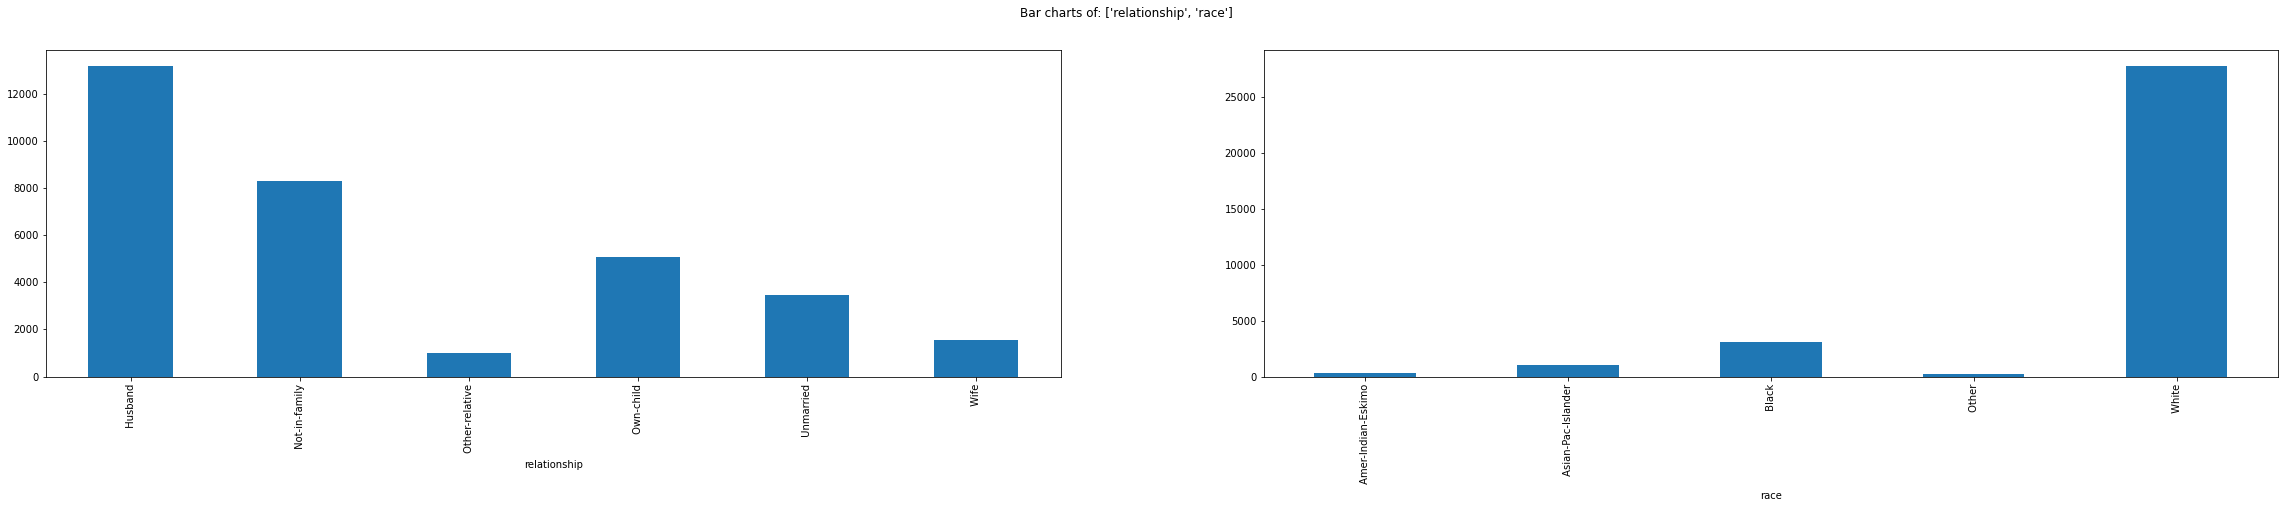

In [188]:
PlotBarCharts(inpData=df, colsToPlot=['relationship', 'race']);


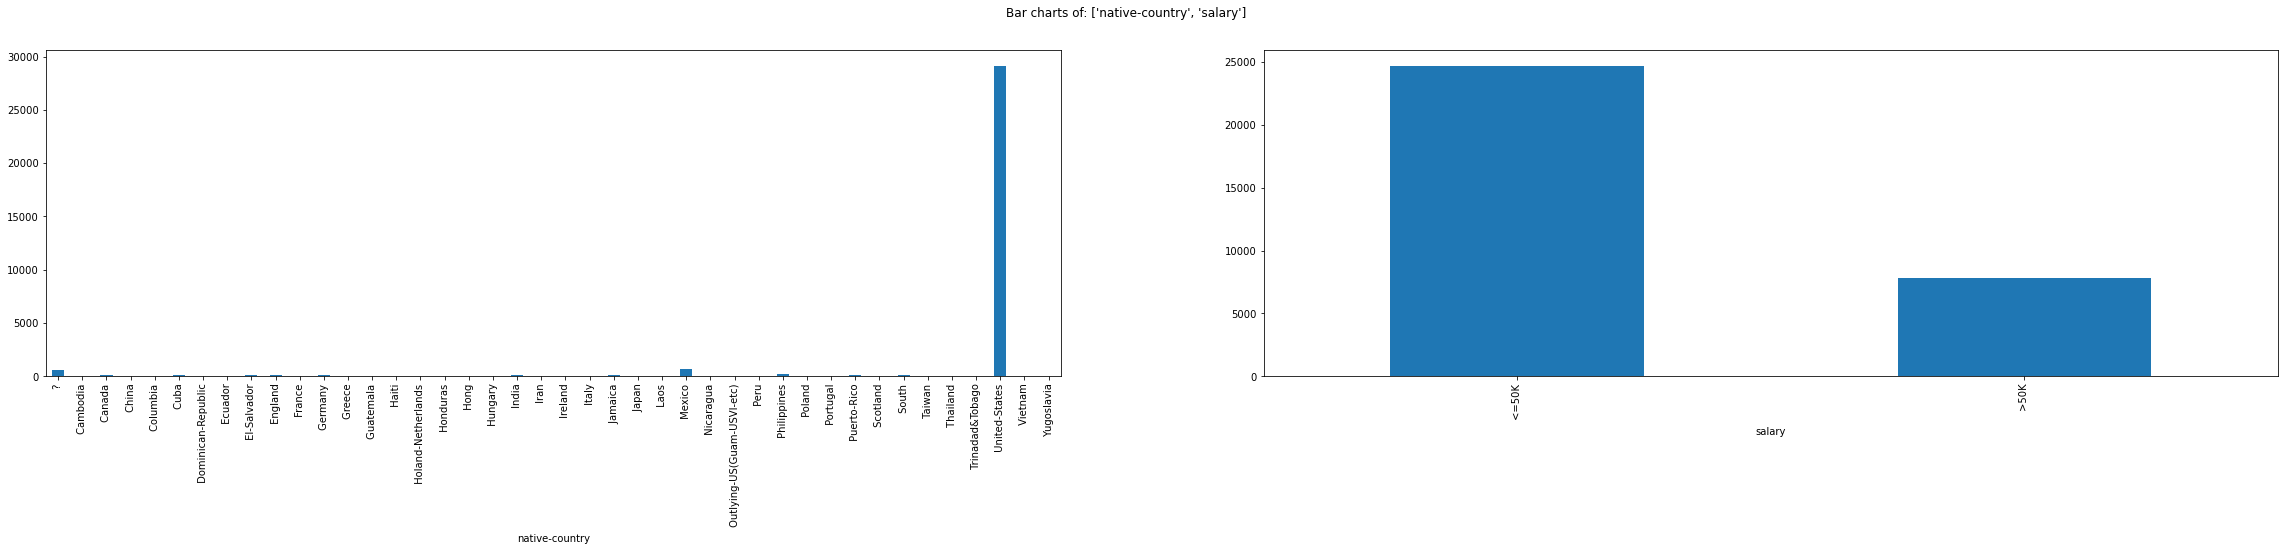

In [189]:
PlotBarCharts(inpData=df, colsToPlot=['native-country', 'salary']);





## Numerical variables

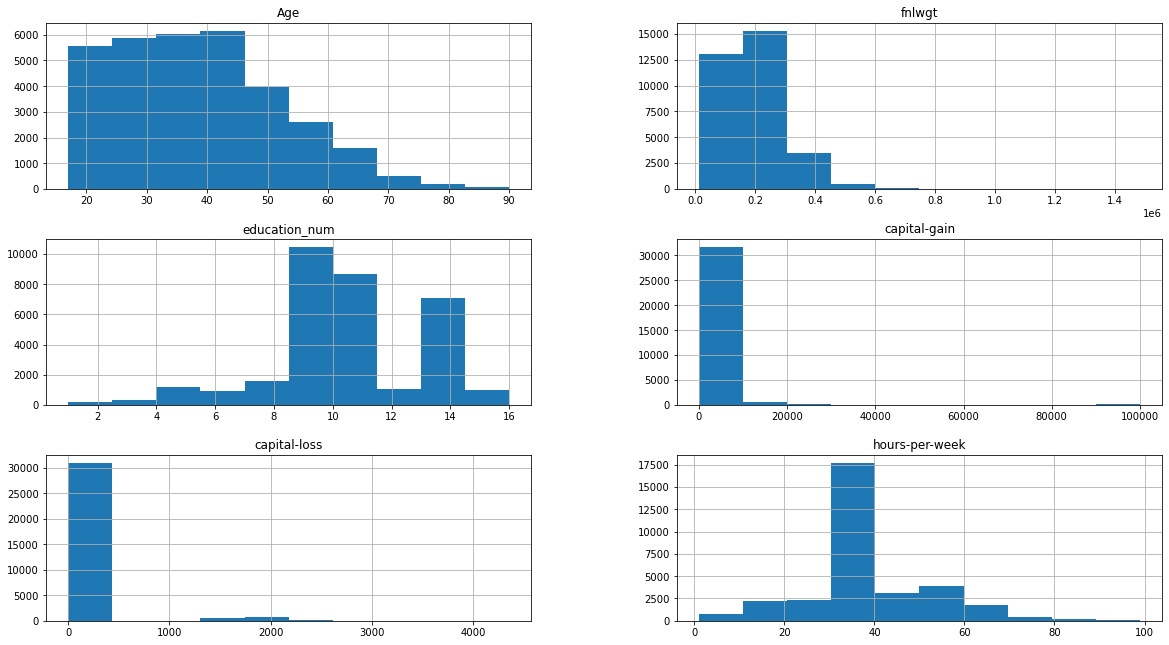

In [190]:
df.hist(['Age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week'], figsize=(20,11));


# 3. What can you tell us about the quality of the dataset? Missing values? Outliers?

## Dealing with outliers 

<Figure size 1080x504 with 0 Axes>

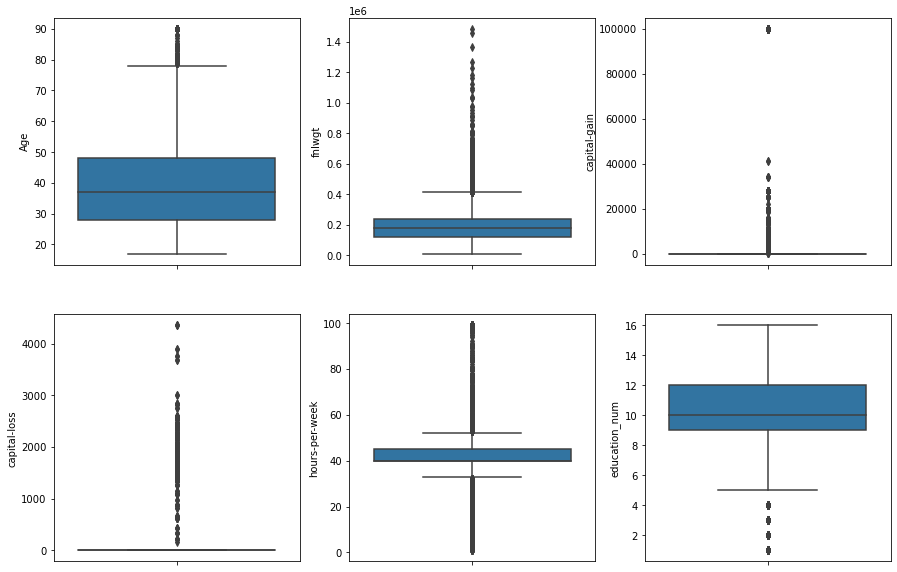

In [191]:
import seaborn as sns
plt.figure(figsize=(15,7));
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,10));
sns.boxplot(y=df["Age"],ax=ax[0][0]);   
sns.boxplot(y=df["fnlwgt"],ax=ax[0][1]);  
sns.boxplot(y=df["capital-gain"],ax=ax[0][2]);
sns.boxplot(y=df["capital-loss"],ax=ax[1][0]);
sns.boxplot(y=df["hours-per-week"],ax=ax[1][1]);
sns.boxplot(y=df["education_num"],ax=ax[1][2]);

In [192]:
#we try Find the nearest values to 650000 mark

df['fnlwgt'][df['fnlwgt']>650000].sort_values()

Id
17297     651396
30499     653574
26774     653574
14841     654141
2761      656036
          ...   
8259     1226583
15570    1268339
16740    1366120
18139    1455435
14450    1484705
Name: fnlwgt, Length: 100, dtype: int64

In [193]:
# We will try to replace the outliers with a logical value instead of dropping the rows that contain outliers

df.loc[:,'fnlwgt'][df['fnlwgt']>651396] = 651396

In [194]:
df['fnlwgt'][df['fnlwgt']>= 650000].count()

100

## Capital gain outliers 

In [195]:
# We try Find the nearest values to 40000 mark

df['capital-gain'][df['capital-gain']>40000].sort_values()

Id
6434     41310
20177    41310
20988    99999
21189    99999
21490    99999
         ...  
12063    99999
12094    99999
12142    99999
32239    99999
32519    99999
Name: capital-gain, Length: 161, dtype: int64

In [196]:
# Replacing outliers with nearest possibe value which is 41310

df['capital-gain'][df['capital-gain']>40000] = 41310

## Capital loss outliers 

In [197]:
# Replacing outliers with nearest possibe value which is 1000
df['capital-loss'][df['capital-loss']>1000].sort_values()

Id
27753    1092
9768     1092
30989    1092
28378    1092
11811    1092
         ... 
23803    3900
20417    3900
8964     4356
14757    4356
30782    4356
Name: capital-loss, Length: 1483, dtype: int64

In [198]:
# Replacing outliers with nearest possibe value which is 1000
df['capital-loss'][df['capital-loss']>1000] = 1092

## Visualise data after handling outliers 

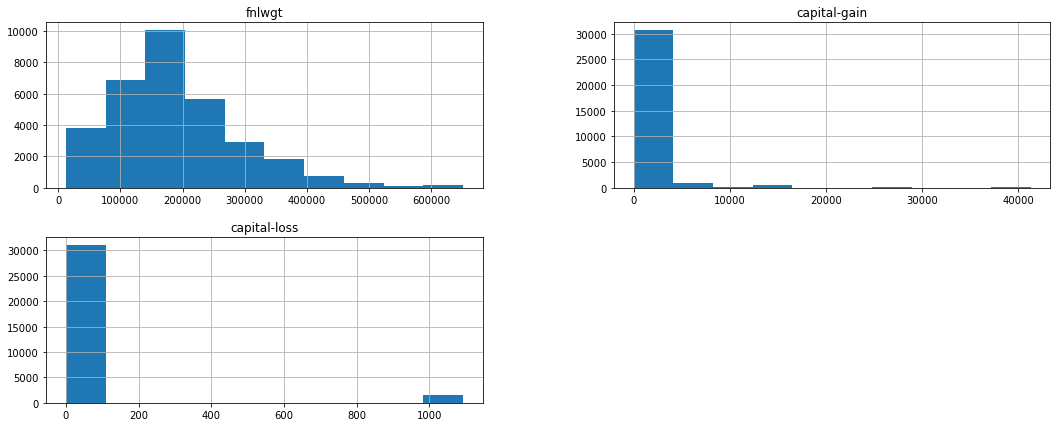

In [199]:
df.hist(['fnlwgt','capital-gain','capital-loss'], figsize=(18,7));

## Missing values treatment

In [200]:

df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [201]:
df['occupation'].unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [202]:
df['workclass'].replace([' ?'],[np.nan], inplace=True)
df['occupation'].replace([' ?'],[np.nan], inplace=True)

In [203]:
df.isnull().sum()
# Our dataset has two columns with missing values 

Age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native-country       0
capital-gain         0
capital-loss         0
hours-per-week       0
salary               0
dtype: int64

In [204]:
# we try to check if any our columns has more than 30% of missing values to drop it.
# The two columns has less than 30% of missing values 
n_obs_trn = df.shape[0]
df.isna().sum()/n_obs_trn

Age               0.000000
workclass         0.056428
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.056643
relationship      0.000000
race              0.000000
sex               0.000000
native-country    0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
salary            0.000000
dtype: float64

In [205]:
# Because the two variables are categorical we will replace them with the mode
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])



In [206]:
df.isnull().sum()




Age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64

# Feature selection

In [207]:
# The function to determine the relationship of our numerical variables with the target variable 
def Anova(features, TargetVar, varList):
    from scipy.stats import f_oneway

    # The list of features that have a strong correlation
    SelectedFeatures=[]
    
    print('ANOVA Correlation :\n')
    for predictor in varList:
        CategoryGroupLists=features.groupby(TargetVar)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If our P value is less than 0.05, then we reject our null hypothesis
        if (AnovaResults[1] < 0.05):
            print(predictor, ' is correlated with our target variable the P-value:', AnovaResults[1],'\n')
            SelectedFeatures.append(predictor)
        else:
            print(predictor, ' is NOT correlated with our target variable the P-value:',
                  AnovaResults[1],'\n')
    
    return(SelectedFeatures)

In [208]:
# List of our continuous variables
ContinuousVariables=['Age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Displaying our numerical variables
Anova(features=df, TargetVar='salary',
              varList=ContinuousVariables)

ANOVA Correlation :

Age  is correlated with our target variable the P-value: 0.0 

fnlwgt  is NOT correlated with our target variable the P-value: 0.09502942418372122 

education_num  is correlated with our target variable the P-value: 0.0 

capital-gain  is correlated with our target variable the P-value: 0.0 

capital-loss  is correlated with our target variable the P-value: 1.0752747434992601e-143 

hours-per-week  is correlated with our target variable the P-value: 0.0 



['Age', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [209]:
# Defining a function to find the statistical relationship with all the categorical variables 

def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # The list of features that have a stong correlation
    SelectedFeatures=[]
    print('Chi-square correlation :\n')

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the P-Value of chi-squared is less than 0.05, then we reject our null hypothesis
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '-- P_value:', ChiSqResult[1])
            SelectedFeatures.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '-- P_value:', ChiSqResult[1])        
            
    return(SelectedFeatures)

In [210]:
# Our categorical variables
CategoricalVariables=['Age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calling the function to display the categorical variable
FunctionChisq(inpData=df, 
              TargetVariable='salary', 
              CategoricalVariablesList= CategoricalVariables)

Chi-square correlation :

Age is correlated with salary -- P_value: 0.0
fnlwgt is correlated with salary -- P_value: 6.08214038268956e-07
education_num is correlated with salary -- P_value: 0.0
capital-gain is correlated with salary -- P_value: 0.0
capital-loss is correlated with salary -- P_value: 2.738433538916678e-138
hours-per-week is correlated with salary -- P_value: 0.0


['Age',
 'fnlwgt',
 'education_num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [211]:
# We have one categorical variable that is not correlated which is fnlwgt


# Correlation Matrix

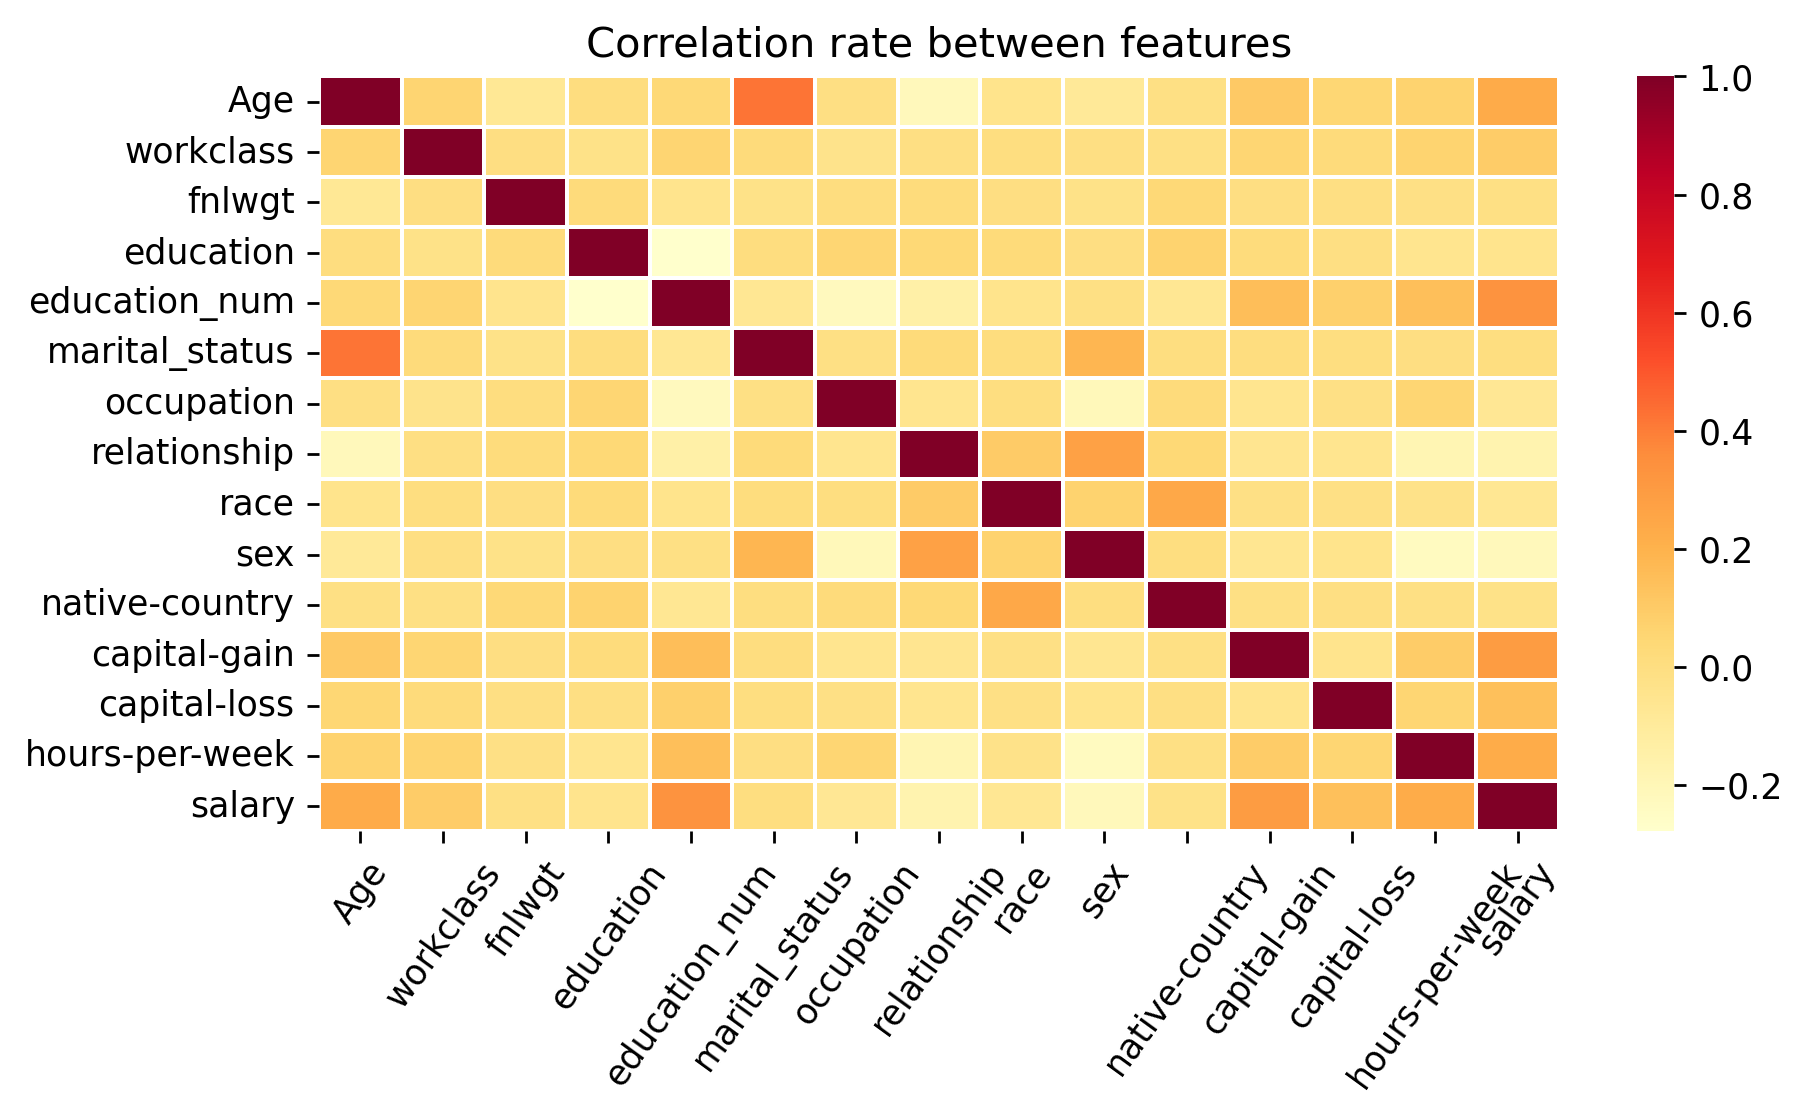

In [212]:
df_copy=df.copy()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df_copy[i]=pd.factorize(df[i])[0]

plt.figure(figsize=(8, 4),dpi=250)
plt.title('Correlation rate between features')
sns.heatmap(df_copy.corr(),lw=1.1,linecolor='white',cmap='YlOrRd')
plt.xticks(rotation = 54 )
plt.yticks( )
plt.show()
corr_matrix = df.corr()
# We can see the high correlated variables 


In [213]:
group_mari=df.groupby('marital_status')['hours-per-week'].mean()
group_mari


marital_status
 Divorced                 41.247242
 Married-AF-spouse        41.130435
 Married-civ-spouse       43.285638
 Married-spouse-absent    39.669856
 Never-married            36.943939
 Separated                39.301463
 Widowed                  32.979859
Name: hours-per-week, dtype: float64

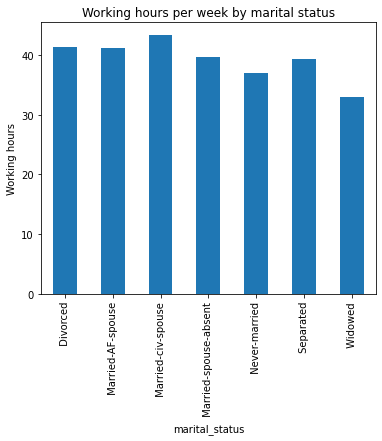

In [214]:
group_mari.plot(kind='bar', title='Working hours per week by marital status',ylabel='Working hours',
        figsize=(6, 5));

In [215]:
group_age=df.groupby('salary')['Age'].mean()
group_age

salary
 <=50K    36.787392
 >50K     44.250925
Name: Age, dtype: float64

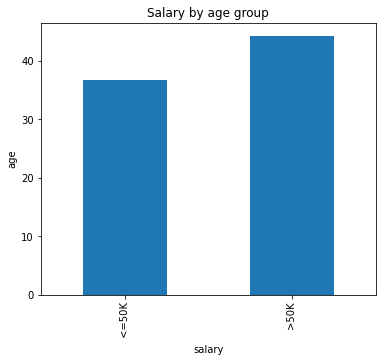

In [216]:
group_age.plot(kind='bar', title='Salary by age group',ylabel='age',
        figsize=(6, 5));

In [217]:
Occupation=df['occupation'].value_counts()
Occupation

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

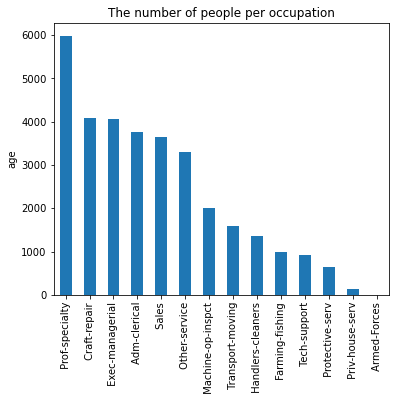

In [218]:
Occupation.plot(kind='bar', title='The number of people per occupation',ylabel='age',
        figsize=(6, 5));

In [219]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [220]:

new_df=df.loc[(df['marital_status'].str.contains('Married'))  & (df['sex']==' Male' )]
new_df

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,native-country,capital-gain,capital-loss,hours-per-week,salary
Id,,,,,,,,,,,,,,,
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0,0,13,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0,0,40,<=50K
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0,0,45,>50K
10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,5178,0,40,>50K
11,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,0,0,80,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0,0,50,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,United-States,0,0,40,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,United-States,0,0,45,<=50K
